Đồ Thị Annotate-human

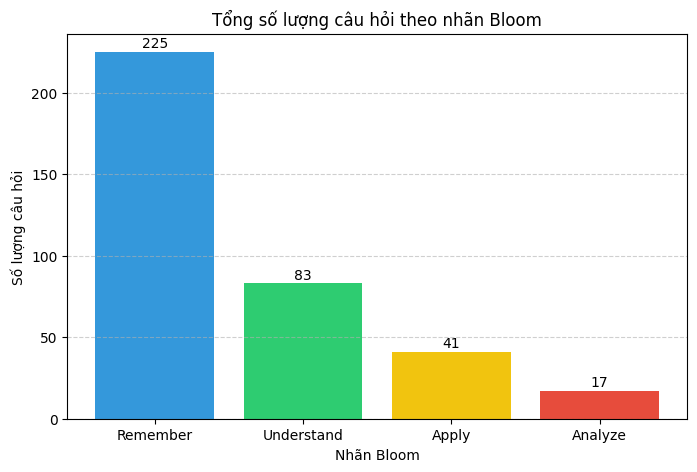

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc 2 file CSV
df1 = pd.read_csv(r'D:\vscodepython\DOAN\uit.PubHealthQA\data\gold\DS102_data\Test_102_labeled_human.csv')
df2 = pd.read_csv(r'D:\vscodepython\DOAN\uit.PubHealthQA\data\gold\DS102_data\Train_102_labeled_human.csv')

# Gộp 2 file lại
df = pd.concat([df1, df2], ignore_index=True)

# Kiểm tra cột nhãn
assert 'bloom' in df.columns, "Thiếu cột 'bloom_label' trong dữ liệu!"

# Danh sách nhãn Bloom theo thứ tự
labels = ['Remember', 'Understand', 'Apply', 'Analyze']

# Đếm số lượng mỗi nhãn
label_counts = df['bloom'].value_counts().reindex(labels, fill_value=0)
# Màu riêng cho từng nhãn
colors = {
    'Remember': '#3498db',    # xanh dương
    'Understand': '#2ecc71',  # xanh lá
    'Apply': '#f1c40f',       # vàng
    'Analyze': '#e74c3c'      # đỏ
}

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
bars = plt.bar(label_counts.index, label_counts.values, color=[colors[label] for label in label_counts.index])

plt.title('Tổng số lượng câu hỏi theo nhãn Bloom')
plt.xlabel('Nhãn Bloom')
plt.ylabel('Số lượng câu hỏi')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Ghi số lên đầu cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom')



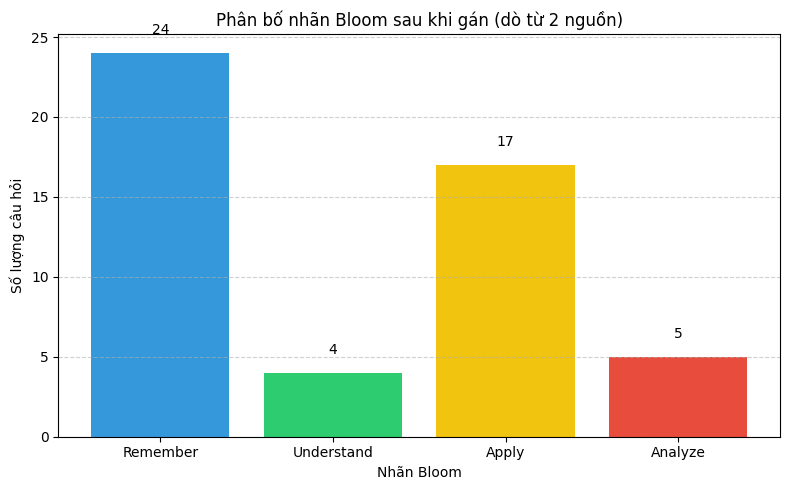

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from rapidfuzz import process, fuzz

# Đọc file chưa gắn nhãn
df_unlabeled = pd.read_csv(r'D:\vscodepython\DOAN\uit.PubHealthQA\data\bronze\raw_QAPair.csv').dropna(subset=['question'])

# Đọc 2 file đã gắn nhãn và gộp lại
df_labeled1 = pd.read_csv(r'D:\vscodepython\DOAN\uit.PubHealthQA\data\gold\DS102_data\Test_102_labeled_human.csv').dropna(subset=['question', 'bloom'])
df_labeled2 = pd.read_csv(r'D:\vscodepython\DOAN\uit.PubHealthQA\data\gold\DS102_data\Train_102_labeled_human.csv').dropna(subset=['question', 'bloom'])

df_labeled = pd.concat([df_labeled1, df_labeled2], ignore_index=True)

# Hàm tìm nhãn gần nhất từ dữ liệu chuẩn
def find_label(question, labeled_df, threshold=90):
    choices = labeled_df['question'].tolist()
    result = process.extractOne(question, choices, scorer=fuzz.token_sort_ratio)
    if result and result[1] >= threshold:
        matched_row = labeled_df[labeled_df['question'] == result[0]]
        return matched_row['bloom'].values[0]
    else:
        return 'Unknown'

# Gán nhãn cho từng câu hỏi chưa có nhãn
df_unlabeled['predicted_label'] = df_unlabeled['question'].apply(lambda q: find_label(q, df_labeled))

# Đếm số lượng nhãn
labels_order = ['Remember', 'Understand', 'Apply', 'Analyze']
label_counts = df_unlabeled['predicted_label'].value_counts().reindex(labels_order, fill_value=0)
# Màu sắc mỗi nhãn
colors = {
    'Remember': '#3498db',
    'Understand': '#2ecc71',
    'Apply': '#f1c40f',
    'Analyze': '#e74c3c',
}

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
bars = plt.bar(label_counts.index, label_counts.values, color=[colors[label] for label in label_counts.index])

plt.title('Phân bố nhãn Bloom sau khi gán (dò từ 2 nguồn)')
plt.xlabel('Nhãn Bloom')
plt.ylabel('Số lượng câu hỏi')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Hiển thị số lên cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, int(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()
